# Fashion_MNIST 데이터 세트에 CNN 적용

In [1]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

# 6.5 데이터를 채널을 가진 이미지 형태(3차원)으로 바꾸기
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


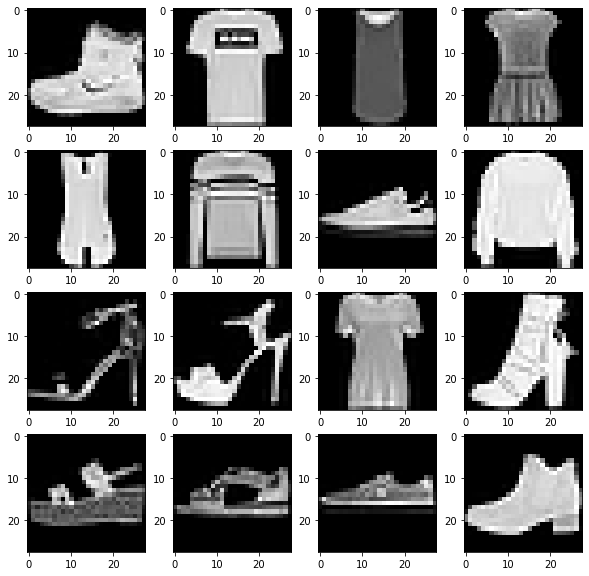

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [2]:
import matplotlib.pyplot as plt

#전체 그래프의 크기를 width=10, height=10으로 지정합니다.
plt.figure(figsize=(10,10))

for c in range(16):
    #4행 4열로 지정한 그리드에서 c+1번째의 칸에 그래프를 그립니다. 1~16번째 칸을 채웁니다.
    plt.subplot(4, 4, c+1)
    plt.imshow(train_X[c].reshape(28,28), cmap='gray')
    
plt.show()

print(train_Y[:16])

### 3개의 Conv2D 레이어  
### 필터 수: 16, 32 ,64
### Flatten 레이어로 1차원 정렬

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=(16)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

Epoch 1/25
1407/1407 [==============================] - 46s 32ms/step - loss: 0.5736 - accuracy: 0.7967 - val_loss: 0.3867 - val_accuracy: 0.8578
Epoch 2/25
1407/1407 [==============================] - 51s 36ms/step - loss: 0.3359 - accuracy: 0.8775 - val_loss: 0.3611 - val_accuracy: 0.8669
Epoch 3/25
1407/1407 [==============================] - 50s 36ms/step - loss: 0.2701 - accuracy: 0.9013 - val_loss: 0.3754 - val_accuracy: 0.8687
Epoch 4/25
1407/1407 [==============================] - 48s 34ms/step - loss: 0.2285 - accuracy: 0.9150 - val_loss: 0.3842 - val_accuracy: 0.8752
Epoch 5/25
1407/1407 [==============================] - 57s 40ms/step - loss: 0.1956 - accuracy: 0.9281 - val_loss: 0.4365 - val_accuracy: 0.8692
Epoch 6/25
1407/1407 [==============================] - 54s 39ms/step - loss: 0.1673 - accuracy: 0.9386 - val_loss: 0.4711 - val_accuracy: 0.8664
Epoch 7/25
1407/1407 [==============================] - 56s 40ms/step - loss: 0.1452 - accuracy: 0.9457 - val_loss: 0.5065 -

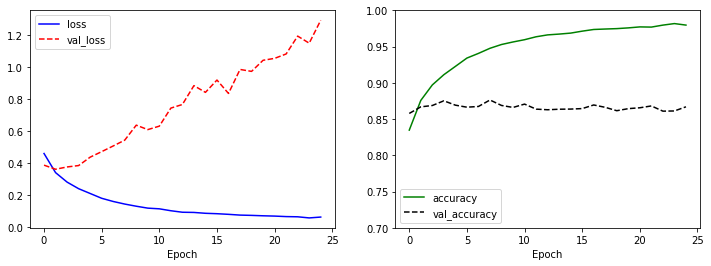

[1.3406559228897095, 0.8615999817848206]

In [4]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as pyplot

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)


In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

Epoch 1/25
1407/1407 [==============================] - 28s 19ms/step - loss: 0.7192 - accuracy: 0.7422 - val_loss: 0.3690 - val_accuracy: 0.8612
Epoch 2/25
1407/1407 [==============================] - 27s 19ms/step - loss: 0.3730 - accuracy: 0.8666 - val_loss: 0.3252 - val_accuracy: 0.8807
Epoch 3/25
1407/1407 [==============================] - 29s 21ms/step - loss: 0.3168 - accuracy: 0.8855 - val_loss: 0.3158 - val_accuracy: 0.8829
Epoch 4/25
1407/1407 [==============================] - 27s 19ms/step - loss: 0.2909 - accuracy: 0.8948 - val_loss: 0.3016 - val_accuracy: 0.8901
Epoch 5/25
1407/1407 [==============================] - 24s 17ms/step - loss: 0.2579 - accuracy: 0.9063 - val_loss: 0.2881 - val_accuracy: 0.8959
Epoch 6/25
1407/1407 [==============================] - 26s 18ms/step - loss: 0.2527 - accuracy: 0.9063 - val_loss: 0.2882 - val_accuracy: 0.8970
Epoch 7/25
1407/1407 [==============================] - 27s 19ms/step - loss: 0.2212 - accuracy: 0.9178 - val_loss: 0.3010 -

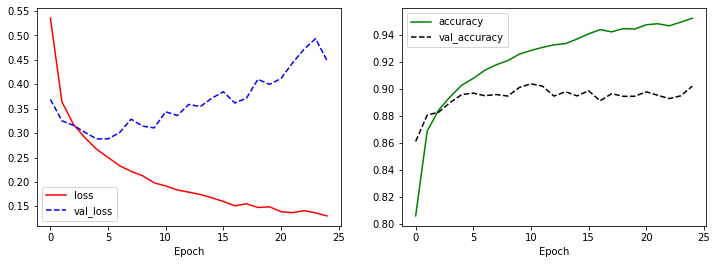

NameError: name 'mdoel' is not defined

In [7]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as pyplot

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r-', label='loss')
plt.plot(history.history['val_loss'],'b--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [8]:
model.evaluate(test_X, test_Y, verbose=0)

[0.46138837933540344, 0.8974000215530396]

## 더 많은 레이어 쌓기  
## VGGNet 스타일로 컨볼루션 신경망 구성

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 256)        

Epoch 1/25
1407/1407 [==============================] - 153s 108ms/step - loss: 0.8698 - accuracy: 0.6742 - val_loss: 0.3353 - val_accuracy: 0.8730
Epoch 2/25
1407/1407 [==============================] - 151s 107ms/step - loss: 0.3860 - accuracy: 0.8580 - val_loss: 0.2934 - val_accuracy: 0.8854
Epoch 3/25
1407/1407 [==============================] - 140s 100ms/step - loss: 0.3275 - accuracy: 0.8828 - val_loss: 0.2519 - val_accuracy: 0.9084
Epoch 4/25
1407/1407 [==============================] - 142s 101ms/step - loss: 0.3113 - accuracy: 0.8912 - val_loss: 0.2455 - val_accuracy: 0.9073
Epoch 5/25
1407/1407 [==============================] - 136s 96ms/step - loss: 0.2857 - accuracy: 0.8972 - val_loss: 0.2217 - val_accuracy: 0.9197
Epoch 6/25
1407/1407 [==============================] - 133s 95ms/step - loss: 0.2750 - accuracy: 0.9015 - val_loss: 0.2270 - val_accuracy: 0.9191
Epoch 7/25
1407/1407 [==============================] - 131s 93ms/step - loss: 0.2618 - accuracy: 0.9053 - val_los

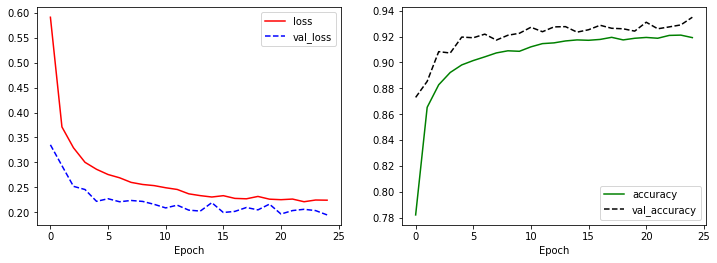

In [14]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as pyplot

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r-', label='loss')
plt.plot(history.history['val_loss'],'b--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [16]:
model.evaluate(test_X, test_Y, verbose=0)

[0.2158074527978897, 0.9248999953269958]

## 이미지 보강

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False
)

augment_size = 100

x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28), 100).reshape(-1,28,28,1),
np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

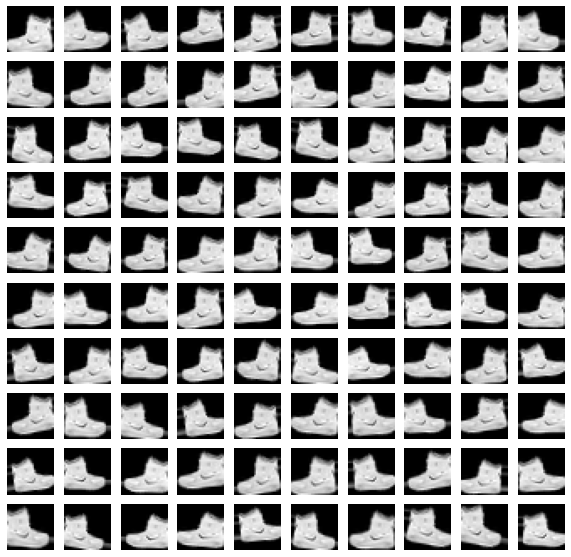

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for c in range(100):
    plt.subplot(10,10,c+1)
    plt.axis('off')
    plt.imshow(x_augmented[c].reshape(28,28), cmap='gray')
plt.show()

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    shear_range=0.5,
    width_shift_range=0.10,
    height_shift_range=0.10,
    horizontal_flip=True,
    vertical_flip=False
)

augment_size = 30000

randidx = np.random.randint(train_X.shape[0], size=augment_size)
# 중복된 정수가 뽑힐 수 있다.
# 중복되지 않도록 하기 위해서는 np.random.choice() 함수 사용, replace 인수를 False로 설정
x_augmented = train_X[randidx].copy()
y_augmented = train_Y[randidx].copy()

x_augmented = image_generator.flow(x_augmented,
np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

# 원래 데이터인 x_train에 이미지 보강된 x_augmented를 추가합니다.
train_X = np.concatenate((train_X, x_augmented))
train_Y = np.concatenate((train_Y, y_augmented))

In [3]:
# 이미지 추가로 보강된 훈련 데이터 학습

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

import matplotlib.pyplot as pyplot

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'r-', label='loss')
plt.plot(history.history['val_loss'],'b--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

Epoch 1/25
1229/2110 [================>.............] - ETA: 1:05 - loss: 0.9714 - accuracy: 0.6375

KeyboardInterrupt: 

In [ ]:
model.evaluate(test_X, test_Y, verbose=0)